* 486351 - Paulo Mateus Moura da Silva
* CCP9002 - Introdução à Modelagem

# Tarefa 2 - Modelagem de doenças infecciosa

## Parte 1

Como todos devem estar sabendo, as atividades presenciais foram suspensas até uma nova avaliação. Por esse motivo, estou abrindo essa atividade remota, que destina-se em usar esse momento de contaminação para estudarmos mais sobre técnicas de modelagem matemática de doenças infecciosas.

Esse tipo de modelo é chamado SIR (_susceptible-infected-recovered_), isto é, (suscetível-infectado-recuperado) em tradução livre. Assim, quero que vocês estudem sobre esse assunto para entender o modelo matemático sugerido e as formas computacionais de resolvê-lo.

Logo, aguardo receber um relatório com explicações de cada parâmetro descrito no modelo e como ele representa o comportamento dessa infecção. Ademais, será bem avaliado o relatório que apresente também uma resolução computacional desse modelo com diferentes cenários.

Essa atividade estará aberta até 23h59 desse domingo, dia 22/03/2020. Vocês podem usar a ferramenta computacional que esteja mais a vontade, mas estarei disponibilizando um material com uma introdução de como usar a ferramenta SciLab, que é um programa gratuito.

Aproveito também para divulgar alguns links com alguns conceitos básicos sobre esse tipo de modelagem, mas não fiquem limitados somente a eles.

 * https://www.maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-introduction
 * http://www.modelinginfectiousdiseases.org/
 * https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology

Qualquer dúvida estou a disposição e aguardo o envio dos relatórios.

Atenciosamente,

Ricardo Coelho

## Parte 2

Fiquei muito contentedos relatórios enviados e espero que vocês tenham conseguido entender algumas técnicas matemáticas no intuito de realizar a modelagem de uma situação real.

Depois de analisar alguns relatórios que foram enviados, verifiquei que há trabalhos com um bom embasamento teórico sobre o modelo SIR e alguns fizeram boas análises diante dos experimentos computacionais realizados. Contudo, há relatórios muito superficiais, tanto do ponto de vista teórico como prático, sendo alguns relatórios superficiais em ambos os pontos. Assim, peço que alguns tentem se esforçar um pouco mais para fornecer um relatório consistente e detalhado, diante do que está sendo solicitado.

No intuito de fornecer uma nova oportunidade a todos, quero que vocês usem o trabalho já realizado por cada um e usem dados reais nesse momento para validar os modelos propostos. Esses dados reais dessa pandemia podem ser encontrados no link disponível abaixo. Vocês podem baixar um arquivo `*.XLSX` ou executar um script em Linguagem R.

* https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide

Diante desses dados reais, vocês podem também comparar o cenário brasileiro com o cenário de outros países e verificar se as medidas adotadas pelos governos (nacional, estaduais e municipais) estão tendo o efeito desejado.

Espero ter sido claro nessa atividade e estou a disposição para sanar alguma dúvida. Ademais, essa atividade é individual e estará disponível até às 23h59 do próximo domingo, dia 29/03/2020.

Aproveito para compartilhar com vocês alguns artigos que podem ajudar nas modelagens propostas por vocês, pois simulam o contágio em alguns cenários possíveis.

* https://www.washingtonpost.com/graphics/2020/world/corona-simulator/
* https://corona.katapult-magazin.de

Atenciosamente,

Ricardo Coelho

## 1. O Modelo SIR - Uma pequena introdução

O texto a seguir foi obtido e adaptado da [Wikipedia](https://pt.wikipedia.org/wiki/Modelo_epid\%C3\%AAmico#O_Modelo_SIR).

Em 1927, W. O. Kermack e A. G. McKendrick criaram um modelo em que se considera uma população fixa com apenas três compartimentos: $S$ - sensível, $I$ - infectado, e, $R$ - removido. Os compartimentos utilizados para este modelo consistem em três classes:

 * $S(t)$ é usado para representar o número de indivíduos não infectados com a doença no momento $t$, ou aqueles suscetíveis à doença;
 * $I(t)$ representa o número de indivíduos no momento $t$ que tenham sido infectadas com a doença e que são capazes de transmitir a doença aos da categoria suscetível;
 * $R(t)$ é o compartimento utilizado para aqueles indivíduos que foram infectados e, em seguida, recuperados (removidos a partir da doença) no momento $t$. Os que estão nesta categoria não são capazes de ser infectados novamente ou para transmitir a infecção a outras pessoas. Na versão simples do SIR, não são consideradas mortes.

O fluxo do presente modelo pode ser considerado da seguinte forma:

$$\text{Suscetíveis} \rightarrow \text{Infectados} \rightarrow \text{Recuperados}$$

Neste caso simples, é considerada uma população fixa, $N = S(t) + I(t) + R(t)$. Em tal situação temos derivadas das seguintes equações:

\begin{align*}
    \frac {dS}{dt} &= -\beta SI \\
    \frac {dI}{dt} &=  \beta SI-\gamma I \\
    \frac {dR}{dt} &=  \gamma I
\end{align*}


Neste modelo, temos também os parêmetros:
 * $\beta$ = taxa de transmissão. Incorpora a taxa de encontro entre indivíduos suscetíveis e infecciosos, juntamente com a probabilidade de transmissão;
 * $\gamma$ = taxa de remoção ou a taxa de recuperação, embora frequentemente estejamos mais interessados em sua recíproca (1/$\gamma$), que determina o período infeccioso médio.

O modelo SIR é um dos modelos comportamentais mais simples, e diversos outros modelos derivam desta foram básica. Nas simulações feitas abaixo, foi aplicado o "[Modelo SIR com mortalidade induzida por doença: Transmissão dependente da frequência](http://homepages.warwick.ac.uk/~masfz/ModelingInfectiousDiseases/Chapter2/Program_2.4/index.html)" com um ajuste para corrigir a taxa de crescimento, dado a hipótese considerada para esta taxa.

## 2. Modelo SIR com mortalidade induzida por doença: Transmissão dependente da frequência

Texto e modelagem baseados em: http://homepages.warwick.ac.uk/~masfz/ModelingInfectiousDiseases/Chapter2/Program_2.4/index.html

Inúmeras doenças infecciosas estão associadas a um risco substancial de mortalidade, incluindo o COVID-19, a doença causada pelo SARS-COV-2 . Como exploramos as consequências da mortalidade induzida por infecção?

Especificamente, como incorporamos uma probabilidade de mortalidade nas equações de SIR? A abordagem óbvia seria adicionar um termo como $-m I(t)$ à equação básica, em que $m$ é uma taxa de mortalidade induzida por doença per capita para indivíduos infectados. No entanto, isso pode ser difícil de interpretar biologicamente ou estimar a partir dos dados.

Em vez disso, é preferível pensar na probabilidade, $\rho$, de um indivíduo da classe $I$ morrer pela infecção antes de se recuperar ou morrer de causas naturais.
Inicialmente, consideramos o caso da transmissão dependente da frequência (**frequency-dependent**), em que quando o tamanho total da população $P$ diminui, devido à mortalidade induzida pela doença, há uma interação reduzida entre os hospedeiros. Para tornar a dinâmica mais clara, passamos a considerar o número ou a densidade (e não a proporção) de indivíduos.


### 2.1 Faça o questionamento

**Problema**: SARS-COV-2, uma nova cepa do _Corona vírus_ muito contagioso apareceu no mundo. O vírus, no qual o paciente zero provavelmente surgio na China, está se espalhando no mundo e matando rapidamente.

**Questionamento**: Qual seria o momento de pico de contaminação aqui no Brasil? Modele a expansão dessa pandemia.

**Variáveis**:

 * $t$ = unidade de tempo (em dia);


 * $\rho$ = probabilidade de motalidade: probabilidade de um indivíduo infectado falecer da doença antes de se recuperar;
 * $\mu$ = taxa de morte per capta por causas naturais;
 * $\upsilon$ = taxa de nascimento populacional;
 * $\beta$ = taxa de transmissão. Incorpora a taxa de encontro entre indivíduos suscetíveis e infecciosos, juntamente com a probabilidade de transmissão;
 * $\gamma$ = taxa de remoção ou a taxa de recuperação, embora frequentemente é do interesse a sua recíproca (1/$\gamma$), que determina o período infeccioso médio;


 * $X(t)$ = número ou densidade de indivíduos suscetíveis no tempo $t$;
 * $Y(t)$ = número ou densidade de indivíduos infecciosos no tempo $t$;
 * $Z(t)$ = número ou densidade de indivíduos recuperados no tempo $t$;
 * $P(t)$ = tamanho da população no tempo $t$;


 * $X(0)$ = número inicial ou a densidade de indivíduos suscetíveis;
 * $Y(0)$ = número inicial ou a densidade de indivíduos infecciosos;
 * $Z(0)$ = número inicial ou a densidade de indivíduos recuperados;
 * $P(0)$ = $X(0) + Y(0) + Z(0)$ = tamanho inicial da população.


**Hipóteses (_assumptions_):**

 * $P(0)$ = $204.450.649$, [segundo IBGE (2015)](https://agenciabrasil.ebc.com.br/internacional/noticia/2015-08/populacao-brasileira-supera-os-204-milhoes);
 * $Y(0)$ = $1$. Consideramos que somente um infectado veio de outro país para o Brasil  
 * $X(0)$ = $P(0) - Y(0) = 204.450.649 - 1 = 204.450.648$, pois é um vírus novo, ao contrário da gripe, por exemplo;
 * $Z(0)$ = $0$;


 * $\rho$ = Definido nas simulações;
 * $\mu$ = $\frac{6,08}{1000}$ ao ano = $\frac{6,08}{1000 * 365}$ ao dia, [segundo IBGE (2015)](https://brasilemsintese.ibge.gov.br/populacao/taxas-brutas-de-mortalidade.html);
 * $\upsilon$ = $\frac{14,16}{1000}$ ao ano = $\frac{14,16}{1000 * 365}$ ao dia, [segundo IBGE (2015)](https://brasilemsintese.ibge.gov.br/populacao/taxas-brutas-de-natalidade.html);
 * $\beta$ = Definido nas simulações;
 * $\gamma$ = Definido nas simulações.

**Objetivo:** Encontrar o $t$ em $I(t)$ atinge o maior valor.

### 2.2 Selecione a abordagem do modelo

A abordagem selecionada para a resolução do problema é a resolução do sistema SIR.


### 2.3 Formule o modelo

Tendo em consideração que o modelo foi construído enviesado ao sistema SIR, podemos já utilizar as equações:

\begin{align*}
    \frac{dX(t)}{dt} &= \upsilon Z(t) - \frac{\beta X(t)Y(t)}{P(t)} - \mu X(t) \\
    \frac{dY(t)}{dt} &= \frac{\beta X(t)Y(t)}{P(t)} - \frac{\gamma+\mu}{1-\rho} Y(t) \\
    \frac{dZ(t)}{dt} &= \gamma Y(t) - \mu Z(t)
\end{align*}

**Observação**: Na modelagem proposta pelo livro, $\upsilon$ aparece sozinho. Mas da forma com este foi definida (ver hiopóteses), ela não tem relação com a população. Desta forma, foi adicionado o fator multiplicativo, ficando $\upsilon Z(t)$.

**Observação**: Note que em $\upsilon Z(t)$ é considerada uma proporção da população total, não somente dos saudáveis. Além disso, pressupõe que não há um risco maior a contaminação de bebês nascidos de mães doentes ([o que não é verdade](https://noticias.uol.com.br/ultimas-noticias/afp/2020/03/26/estudo-aponta-que-transmissao-de-coronavirus-durante-a-gravidez-e-raro-mas-possivel.htm)) e nem que crianças nascidas de mães recuperadas são automaticamente imunes (não foi encontrado dados sobre essa possibilidade).

### 2.4 Solucione o modelo

O modelo foi executado iterativamente. Abaixo as simulações para diferentes valores de $\beta$, de $\gamma$ e de $\rho$.


In [1]:
import scipy.integrate as spi
import numpy as np
import pylab as pl

from plot import plot

In [30]:
import pandas as pd

def dataset(pais):
    dataset = pd.read_csv('./dataset-20-03-2020.csv', encoding='iso-8859-1')
    dataset['date'] = pd.to_datetime(dataset.dateRep, format='%d/%m/%Y')

    dataset_pais = dataset[(dataset.countriesAndTerritories == pais) & (dataset.date >= '26/02/2020')].sort_values(by='date').copy()

    dataset_pais['cum_cases'] = np.cumsum(dataset_brasil.cases)
    dataset_pais['cum_deaths'] = np.cumsum(dataset_brasil.deaths)
    
    return dataset_pais

dataset('Brazil').head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,date,cum_cases,cum_deaths
980,26/02/2020,26,2,2020,1,0,Brazil,BR,BRA,209469333.0,2020-02-26,1,0
979,27/02/2020,27,2,2020,0,0,Brazil,BR,BRA,209469333.0,2020-02-27,1,0
978,28/02/2020,28,2,2020,0,0,Brazil,BR,BRA,209469333.0,2020-02-28,1,0
977,29/02/2020,29,2,2020,0,0,Brazil,BR,BRA,209469333.0,2020-02-29,1,0
976,01/03/2020,1,3,2020,1,0,Brazil,BR,BRA,209469333.0,2020-03-01,2,0


 País: Brazil

Parâmetros
-------------------------------

 - υ: Taxa de natalidade: 3.8794520547945204e-05
 - μ: Taxa de mortalidade (por mortes naturais): 1.6657534246575344e-05

 - γ: Taxa de recuperação: 14.0 dias
 - ρ: Probabilidade de falecimento: 4.00%
 - β: Taxa de transmissão: 0.3835616438356164


26/02/2020 - Data de identificação do primeiro infectado
03/05/2020 - Dia de pico de infectados (67º dia de contágio)

População inicial:   204.450.649 habitantes
População em um ano: 197.298.552 habitantes
Diferença na população em um ano: 7.152.097 de habitantes a menos


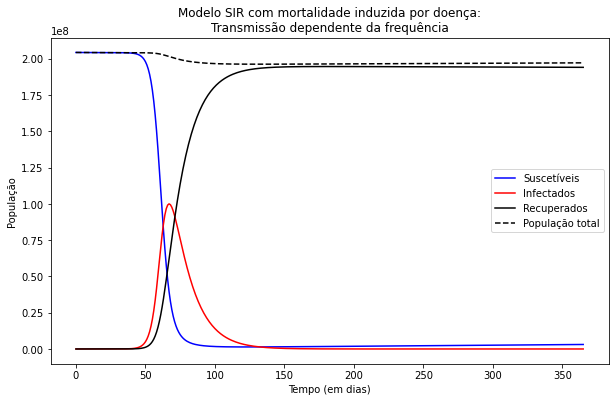

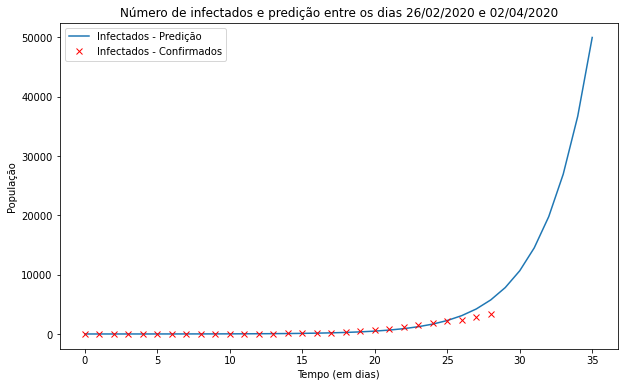

In [84]:
from dataclasses import dataclass
import locale
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

@dataclass
class Parametros:
    pais: str

    μ: float
    υ: float

    β: float
    γ: float
    ρ: float

    P_0: float
    Y_0: float = 1

    tempo_step: int = 1
    numero_dias: float = 365.0


class Simulacao:
    def __init__(self, parametros):
        self.parametros = parametros
        
    def equacoes_diferenciais(self):
        β = self.parametros.β
        γ = self.parametros.γ
        ρ = self.parametros.ρ

        υ = self.parametros.υ
        μ = self.parametros.μ

        def diff_eqs(passo_anterior, t):
            X, Y, Z = passo_anterior

            P = sum((X, Y, Z))

            X_next = υ*Z - β*X*Y/P - μ*X
            Y_next = β*X*Y/P - (γ+μ)/(1-ρ) * Y
            Z_next = γ*Y - μ*Z

            #X_next = -β*X*Y/P
            #Y_next = β*X*Y/P - (γ)/(1-ρ) * Y
            #Z_next = γ*Y

            return np.array([X_next, Y_next, Z_next])

        return diff_eqs

    def simular(self):
        P_0 = self.parametros.P_0

        Y_0 = self.parametros.Y_0
        X_0 = P_0 - Y_0
        Z_0 = P_0 - X_0 - Y_0

        INPUT = (X_0, Y_0, Z_0)

        tempo_step = self.parametros.tempo_step
        numero_dias = self.parametros.numero_dias

        t_inicio = 0.0; t_fim = numero_dias; t_incremento = tempo_step
        t_intervalo = np.arange(t_inicio, t_fim + t_incremento, t_incremento)

        resultado = spi.odeint(self.equacoes_diferenciais(), INPUT, t_intervalo)

        return Relatorio(self.parametros, resultado)


class Relatorio:
    def __init__(self, parametros, resultado):
        self.parametros = parametros
        self.resultado = resultado
        self.dataset = dataset(self.parametros.pais)

    def relatorio(self):
        print('===============================')
        print(f' País: {self.parametros.pais}')
        print('===============================')
        print()
        print('Parâmetros')
        print('-------------------------------')
        print()
        print(f' - υ: Taxa de natalidade: {self.parametros.υ}')
        print(f' - μ: Taxa de mortalidade (por mortes naturais): {self.parametros.μ}')
        print()
        print(f' - γ: Taxa de recuperação: {self.parametros.γ ** -1} dias')
        print(f' - ρ: Probabilidade de falecimento: {self.parametros.ρ * 100:.2f}%')
        print(f' - β: Taxa de transmissão: {self.parametros.β}')
        print()

        print()
        pico = np.argmax(self.I)
        dia_primeira_infeccao = self.dataset.dateRep.values[0]
        dia_pico = self.dataset.date.values[0] + np.timedelta64(pico, "D")
        dia_pico_formatado = pd.to_datetime(str(dia_pico)).strftime('%d/%m/%Y')

        print(f'{dia_primeira_infeccao} - Data de identificação do primeiro infectado')
        print(f'{dia_pico_formatado} - Dia de pico de infectados ({pico}º dia de contágio)')
        
        populacao_inicial = sum(self.resultado[0,:3])
        populacao_final = sum(self.resultado[-1,:3])
        habitantes = np.ceil(populacao_inicial - populacao_final)
        print()
        print(f'População inicial:   {locale.format("%d", populacao_inicial, grouping=True)} habitantes')
        print(f'População em um ano: {locale.format("%d", populacao_final, grouping=True)} habitantes')
        print(f'Diferença na população em um ano: {locale.format("%d", habitantes, grouping=True)} de habitantes a menos')

    def plot_geral(self):
        pl.figure(figsize=(10, 6))
        pl.title('Modelo SIR com mortalidade induzida por doença:\nTransmissão dependente da frequência')

        pl.plot(self.S, '-b', label='Suscetíveis')
        pl.plot(self.I, '-r', label='Infectados')
        pl.plot(self.R, '-k', label='Recuperados')

        pl.plot(self.P, '--k', label='População total')
        pl.xlabel('Tempo (em dias)')
        pl.legend(loc=0)
        pl.ylabel('População') # \n(em 100 milhões de habitantes)
        pl.show()

    def plot_comparativo(self):
        casos_reais = self.dataset.cum_cases.values
        total_dias = len(casos_reais) + 7

        mortos_dia_a_dia = [ontem - hoje for hoje, ontem in zip(self.P[1:], self.P)]
        #mortos = np.cumsum(mortos_dia_a_dia)[:total_dias]
        
        dia_primeira_infeccao = self.dataset.dateRep.values[0]
        dia_final = self.dataset.date.values[0] + np.timedelta64(total_dias, "D")
        dia_final_formatado = pd.to_datetime(str(dia_final)).strftime('%d/%m/%Y')
        
        pl.figure(figsize=(10, 6))
        pl.title(f'Número de infectados e predição entre os dias {dia_primeira_infeccao} e {dia_final_formatado}')
        pl.plot(self.I[:total_dias], '-', label='Infectados - Predição')
        pl.plot(casos_reais, 'xr', label='Infectados - Confirmados')
        #pl.plot(mortos, '-o', label='Mortos')

        pl.legend(loc=0)
        pl.xlabel('Tempo (em dias)')
        pl.ylabel('População') # (em 1 habitante)
        pl.show()

    @property
    def S(self):
        return self.resultado[:, 0]

    @property
    def I(self):
        return self.resultado[:, 1]

    @property
    def R(self):
        return self.resultado[:, 2]
    
    @property
    def P(self):
        return sum([self.S, self.I, self.R])


params = Parametros(
    pais= 'Brazil',

    μ = 6.08/(1000 * 365),
    υ = 14.16/(1000 * 365),
    
    β=140/365,
    γ=1/14.,
    ρ=4/100,
    
    P_0 = 204_450_649,
    Y_0 = 1
)

brasil = Simulacao(params)

relatorio = brasil.simular()
relatorio.relatorio()
relatorio.plot_geral()
relatorio.plot_comparativo()

In [3]:
casos_corona = dataset_brasil.cum_cases.values

def simulacao(β, γ, ρ, plot=True):
    P_0 = 204_450_649.

    Y_0 = 1
    X_0 = P_0 - Y_0
    Z_0 = P_0 - X_0 - Y_0
    
    W_0 = 1
    
    μ = 6.08/(1000 * 365)
    υ = 14.16/(1000 * 365)
    
    def diff_eqs(passo_anterior, t):
        X, Y, Z, W = passo_anterior
        
        P = sum((X, Y, Z))

        X_next = υ*Z - β*X*Y/P - μ*X
        Y_next = β*X*Y/P - (γ+μ)/(1-ρ) * Y
        Z_next = γ*Y - μ*Z
        
        #X_next = - β*X*Y/P
        #Y_next = β*X*Y/P - (γ)/(1-ρ) * Y
        #Z_next = γ*Y

        W_next = 0#μ*Z

        return np.array([X_next, Y_next, Z_next, W_next])

    INPUT = (X_0, Y_0, Z_0, W_0)
    
    tempo_step = 1
    numero_dias = 365.0

    t_inicio = 0.0; t_fim = numero_dias; t_incremento = tempo_step
    t_intervalo = np.arange(t_inicio, t_fim + t_incremento, t_incremento)

    RES = spi.odeint(diff_eqs, INPUT, t_intervalo)
    if plot:
        print(f'Dia de pico de infectados: {np.argmax(RES[:,1])}')
        print(f'Diferença na população em um ano: {sum(RES[0,:3]) - sum(RES[-1,:3])}')
        plot_geral(RES)
        plot_comparativo(RES, casos_corona)
    return RES


def plot_comparativo(RES, casos_reais):
    total_dias = len(casos_reais) + 7

    S, I, R = RES[:,0], RES[:,1], RES[:,2]
    populacao = sum((S,I,R))
    mortos_dia_a_dia = [ontem - hoje for hoje, ontem in zip(populacao[1:], populacao)]
    mortos = np.cumsum(mortos_dia_a_dia)[:total_dias]
    
    pl.figure(figsize=(10, 6))
    pl.title('Número de infectados e predição entre os dias 25/02/2020 e 27/03/2020')
    pl.plot(RES[:,1][:total_dias], '-', label='Infectados - Predição')
    pl.plot(casos_reais, 'xr', label='Infectados - Confirmados')
    #pl.plot(mortos, '-o', label='Mortos')
    
    pl.legend(loc=0)
    pl.xlabel('Tempo (em dias)')
    pl.ylabel('População') # (em 1 habitante)
    pl.show()


def plot_geral(RES):
    S, I, R = RES[:,0], RES[:,1], RES[:,2]

    mortos = RES[:,3]#np.cumsum(RES[:,3])
    populacao = sum((S,I,R))
    mortos_dia_a_dia = [ontem - hoje for hoje, ontem in zip(populacao[1:], populacao)]
    mortos = np.cumsum(mortos_dia_a_dia)
    #print(mortos)

    pl.figure(figsize=(10, 6))
    pl.title('Modelo SIR com mortalidade induzida por doença:\nTransmissão dependente da frequência')

    pl.plot(S, '-b', label='Suscetíveis')
    pl.plot(I, '-r', label='Infectados')
    pl.plot(R, '-k', label='Recuperados')
    #pl.plot(mortos, '-', label='Mortos pela enfermidade')

    pl.plot(sum((S,I,R)), '--k', label='População total')
    pl.xlabel('Tempo (em dias)')
    pl.legend(loc=0)
    pl.ylabel('População') # \n(em 100 milhões de habitantes)
    pl.show()

In [4]:
from GPyOpt.methods import BayesianOptimization

def rmse(data, reconstructed):
    return np.sqrt(np.mean(np.square(data - reconstructed)))

def simulacao_com_otimizacao_β(γ, ρ, max_iter=200):
    bounds = [
        {'name': 'β', 'type': 'continuous', 'domain': (0.001, 5.)},
        #{'name': 'γ', 'type': 'continuous', 'domain': (1/21, 1/3)},
        #{'name': 'ρ', 'type': 'continuous', 'domain': (0.8/100, 15/100)},
    ]

    def f(x):
        β = x[0][0]
        resultado = simulacao(β=β, γ=γ, ρ=ρ, plot=False)

        infectados = resultado[:,1][:len(casos_corona)]
        return rmse(infectados, casos_corona)

    optimization = BayesianOptimization(f=f, domain=bounds, verbosity=True)
    optimization.run_optimization(max_iter=max_iter)

    print('RMSE:', optimization.fx_opt)
    print('β encontrado:', optimization.x_opt)

    simulacao(*optimization.x_opt, γ=γ, ρ=ρ)

#### 2.4.1 Cenário 1 - Mediano

RMSE: 362.7156475411049
β encontrado: [0.36187391]
Dia de pico de infectados: 72
Diferença na população em um ano: 7175875.074377179


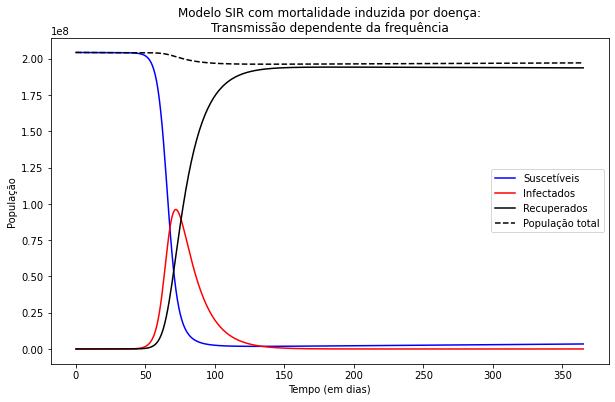

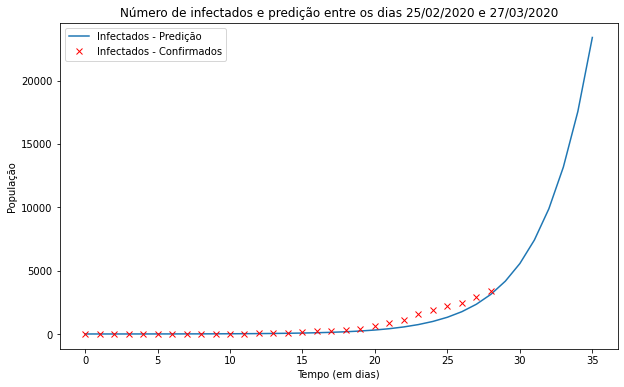

In [5]:
#simulacao(β=140/365, γ=1/14., ρ=4/100)
simulacao_com_otimizacao_β(γ=1/14, ρ=4/100)

#### 2.4.2 Cenário 2 - Crítico

RMSE: 271.7952375687815
β encontrado: [0.36891771]
Dia de pico de infectados: 70
Diferença na população em um ano: 7168000.118143976


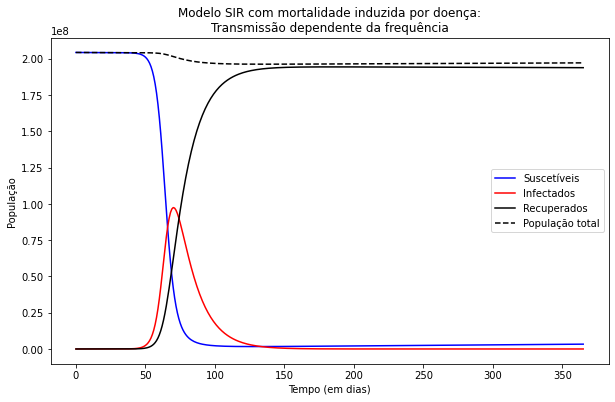

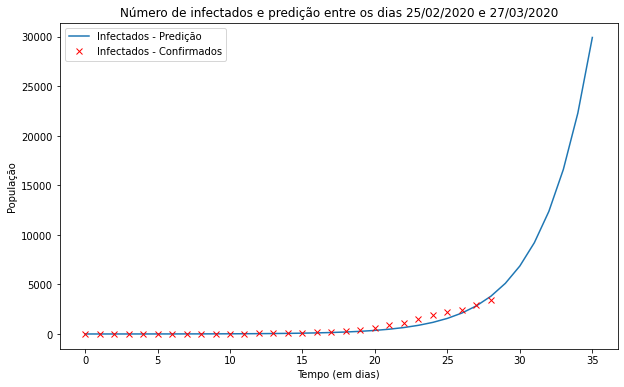

In [6]:
#simulacao(β = 135/365, γ = 1/25., ρ=15/100)
simulacao_com_otimizacao_β(γ=1/14, ρ=4/100)

#### 2.4.3 Cenário 3 - Brando

RMSE: 282.58409601960886
β encontrado: [0.44494509]
Dia de pico de infectados: 67
Diferença na população em um ano: 1960092.895560205


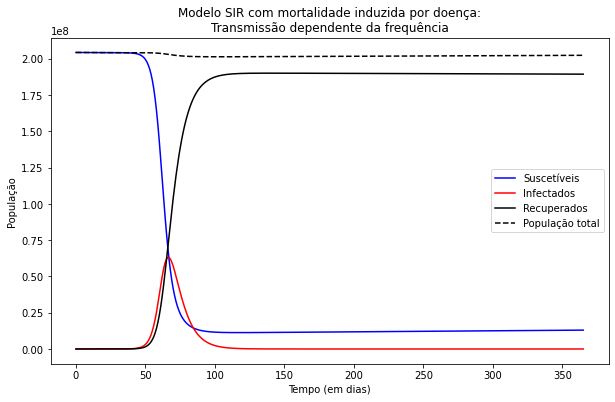

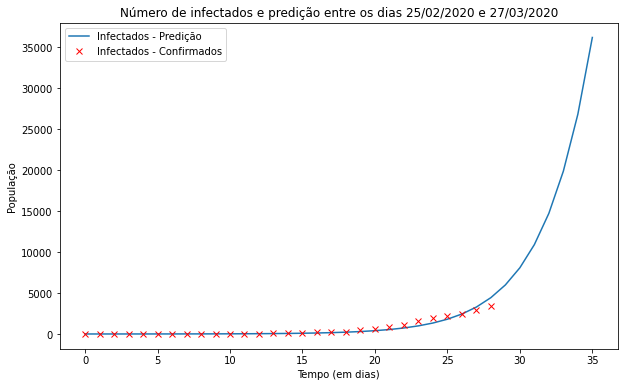

In [7]:
#simulacao(β = 168/365, γ = 1/7., ρ=1.5/100)
simulacao_com_otimizacao_β(γ=1/7., ρ=1.5/100)

RMSE: 271.75692633807387
β, γ, e ρ encontrados: [0.5609862  0.22285124 0.15      ]
Dia de pico de infectados: 64
Diferença na população em um ano: 25763835.737298816


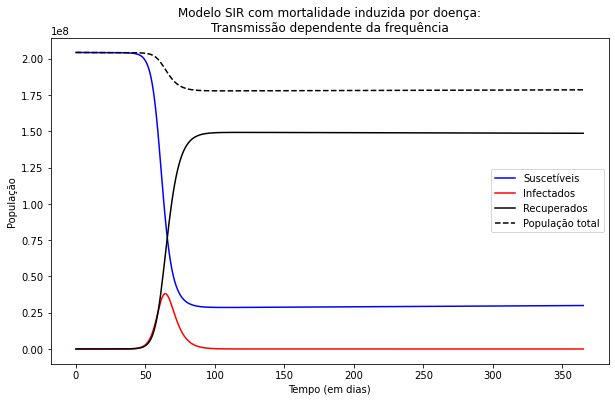

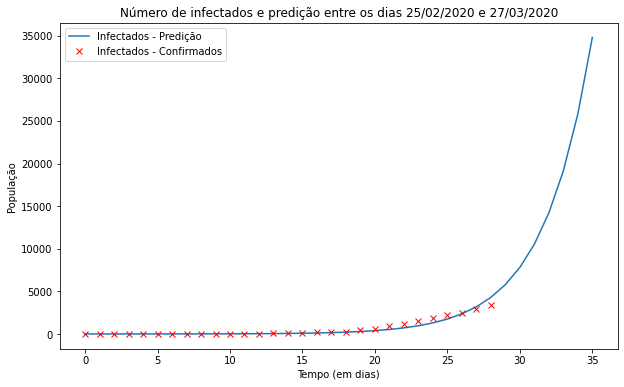

In [8]:
def simulacao_com_otimizacao_total(max_iter=200):
    bounds = [
        {'name': 'β', 'type': 'continuous', 'domain': (0.001, 5.)},
        {'name': 'γ', 'type': 'continuous', 'domain': (1/21, 1/3)},
        {'name': 'ρ', 'type': 'continuous', 'domain': (0.8/100, 15/100)},
    ]

    def f(x):
        β, γ, ρ = x[0]
        resultado = simulacao(β=β, γ=γ, ρ=ρ, plot=False)

        infectados = resultado[:,1][:len(casos_corona)]
        return rmse(infectados, casos_corona)

    optimization = BayesianOptimization(f=f, domain=bounds, verbosity=True)
    optimization.run_optimization(max_iter=max_iter)

    print('RMSE:', optimization.fx_opt)
    print('β, γ, e ρ encontrados:', optimization.x_opt)

    simulacao(*optimization.x_opt)

simulacao_com_otimizacao_total()

### 2.4.5 Responda o questionamento

Na modelagem definida, foi considerado o processo de transmissão somente localizado, sem a importação de novos casos, com excessão do primeiro caso.

Foram testados três cenários, um mediano, um crítico e um brando. Em todos os casos, foram obtidas informações da população brasileira disponibilizado pelo Instituto Brasileiro de Geografia e Estatistica - IBGE para o ano de 2015. Os outros parâmetros são 
* **taxa de recuperação** (ou 1 sobre período infeccioso médio);
* **probabilidade de falecimento**;
* **taxa de transmissão** de indivíduos suscetíveis a adoecerem e individos infecciosos;

Dentre as considerações feitas, pode-se numerar:

1. Foi considerado o tempo de infectabilidade nos intervalos 7, 14 e 25 dias. [Os sintomas aparecem e se desenvolvem entre 3 e 25 dias](https://g1.globo.com/bemestar/coronavirus/noticia/2020/03/21/covid-19-gripe-resfriado-e-alergias-tem-sintomas-parecidos-mas-duracao-e-evolucao-sao-diferentes.ghtml);
1. [25/02/2020: Primeiro caso confirmado de Corona Virus no país](https://www1.folha.uol.com.br/equilibrioesaude/2020/02/brasil-confirma-primeiro-caso-do-novo-coronavirus.shtml)
1. 21/03/2020: [A taxa de fatalidade atualmente no Brasil está em 1.5%](https://www.youtube.com/watch?v=q3WbwfEHQV0);
1. 21/03/2020: [A taxa de fatalidade atualmente média no mundo está em 4%](https://www.youtube.com/watch?v=q3WbwfEHQV0);
1. Um cenário pessimista, a taxa de fatalidade estaria em [14%, que é a taxa de mortalidade de pessoas acima dos 80 anos](https://tvbrasil.ebc.com.br/reporter-brasil/2020/03/14-dos-casos-de-covid-19-em-idosos-resultaram-em-morte-diz-estudo);
1. A preocupação é que a orientação até ontem (20/03/2020) era que só deveria procurar um teste aqueles que apresentassem as maiores complicações, e além disso, [80% dos casos com COVID-19 são assintomáticos](https://www.youtube.com/watch?v=q3WbwfEHQV0)
1. Dada as informações coletadas, esta previsão, que deveria prever o total de infectados, está possivelmente prevendo o total de casos sérios;
1. Entretanto, [o governo diz vai tomar medidas de executar testes em massa. Diz que nas próximas semanas, realização 10.000.000 de testes](https://g1.globo.com/bemestar/coronavirus/noticia/2020/03/21/brasil-tem-1128-casos-confirmados-de-novo-coronavirus-diz-ministerio.ghtml). [Na Coreia do Sul, a média é de uma pessoa testada por 250 habitantes](https://www.nexojornal.com.br/expresso/2020/03/13/Coronav%C3%ADrus-as-a%C3%A7%C3%B5es-da-Coreia-do-Sul-e-as-li%C3%A7%C3%B5es-para-o-Brasil), [enquanto no Brasil, os 5.000 testes realizados no país comprados até 21/03/2020](https://www.youtube.com/watch?v=q3WbwfEHQV0) atualmente dá um pessoa testada por 40.000 habitantes;
1. [Em 2017 havia 1,7 leitos disponíveis por mil habitantes](https://portal.fiocruz.br/noticia/relatorio-aponta-reducao-no-numero-de-leitos-no-brasil), que dá aproximadamnte 3.440 leitos. Por comparação, [na Alemanha são 25.000 leitos](https://www.opovo.com.br/noticias/mundo/2020/03/19/o-misterio-do-baixo-numero-de-mortos-por-coronavirus-na-alemanha.html?fbclid=IwAR1je3IvE8MH3vZrJ5bLbLT1Tpkj9lcwLv6bSvCh0jftDxUcCByWzc-2Kgg) para uma população de 82,8 milhões de habitantes ([em 31 de dezembro de 2015](https://pt.wikipedia.org/wiki/Alemanha)).

Além disto é importante deixar claro que **não entendi direito** como definir a taxa de recuperação. Desta forma, tal taxa foi estimada com base n[os dados confirmados de infecções pelo ministério da saúde](https://g1.globo.com/bemestar/coronavirus/noticia/2020/03/21/casos-de-coronavirus-no-brasil-em-21-de-marco.ghtml). O ajuste foi feito manualmente, alterando o valor e ajustando para a curva se enquadrar. 

Dito isso, estes são os resultados.

#### 2.4.5.1 Simulação: Mediano

* **taxa de recuperação**: $14$ dias;
* **probabilidade de falecimento**; $4\%$
* **taxa de transmissão** $140/365$;
* Dia de pico: 02/05/2020;
* Diferença da população em um ano: 8.842.742 de habitantes a menos.


#### 2.4.5.2 Simulação: Crítico

* **taxa de recuperação**: $25$ dias;
* **probabilidade de falecimento**; $15\%$
* **taxa de transmissão** $135/365$;
* Dia de pico: 01/05/2020
* Diferença da população em um ano: 31.327.403 de habitantes a menos.


#### 2.4.5.3 Simulação: Brando

* **taxa de recuperação**: $7$ dias;
* **probabilidade de falecimento**; $1.5\%$
* **taxa de transmissão** $168/365$;
* Dia de pico: 28/04/2020
* Diferença da população em um ano: 3.556.332 de habitantes a menos.
